<a href="https://colab.research.google.com/github/Hira63S/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg

from numpy.linalg import eig

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

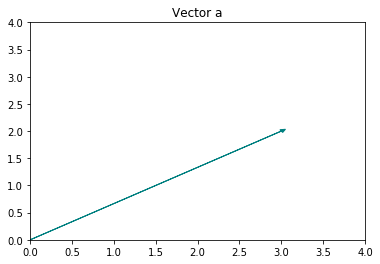

In [0]:
a = np.array([3, 2])
a

plt.arrow(0, 0, 3, 2, head_width=.06, head_length=.06, color = 'Teal')
plt.xlim(0,4)
plt.ylim(0,4)
plt.title('Vector a')
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [0]:
def vector_norm(vector):
  return (sum([vector[i]**2 for i in range(len(vector))])**.5)

b = np.array([17, -4, -2, 1])
vector_norm(b)

17.60681686165901

The norm represents the length of a vector.

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [0]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

#One way#
product = np.multiply(c, d)
print(product)

add = (27 + (-49) + (-8) + 72)
print(add)

#Second Way
dot_product = ((3*9) + (7*-7) + (-2*4) + (12*6))
dot_product

[ 27 -49  -8  72]
42


42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
E = np.array([[7,4,2],
             [1,3,-1],
             [2,6,-4]])

E_inv = linalg.inv(E)
E_inv

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [0]:
E_transpose = np.transpose(E)
E_transpose

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [0]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [0]:
def variance(nums):
  mean = sum(nums)/len(nums)
  return sum((x-mean) ** 2 for x in nums) / len(nums)

In [0]:
cust_mean = np.mean(customers)
cust_var = variance(customers)
cust_std = np.std(customers)

print(cust_mean)
print(cust_var)
print(cust_std)


1135.7142857142858
84653.06122448981
290.95199127087926


In [0]:
snow_mean = np.mean(snow)
snow_var = np.var(snow)
snow_std = np.std(snow)

print(snow_mean)
print(snow_var)
print(snow_std)


2.7142857142857144
7.346938775510203
2.7105237087157534


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

The variance for customers is extremely high and the variance for inches of snow is near the maximum value of inches of snow. The variances are not comparable because these are two different variables, measuring different features.

In [0]:
print("How many times bigger is Customer variance than Snow variance? ", cust_var/snow_var)


How many times bigger is Customer variance than Snow variance?  11522.222222222224


## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [0]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [386]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [387]:
df.shape

(4, 18)

In [388]:
df.columns.tolist()

['Country',
 'Cheese',
 'Carcass_Meat',
 'Other_Meat',
 'Fish',
 'Fats_and_Oils',
 'Sugars',
 'Fresh_Potatoes',
 'Fresh_Veg',
 'Other_Veg',
 'Processed_Potatoes',
 'Processed_Veg',
 'Fresh_Fruit',
 'Cereals',
 'Beverages',
 'Soft_Drinks',
 'Alcoholic Drinks',
 'Confectionery']

Separate into label and target:


In [0]:
X = df[['Cheese',
 'Carcass_Meat',
 'Other_Meat',
 'Fish',
 'Fats_and_Oils',
 'Sugars',
 'Fresh_Potatoes',
 'Fresh_Veg',
 'Other_Veg',
 'Processed_Potatoes',
 'Processed_Veg',
 'Fresh_Fruit',
 'Cereals',
 'Beverages',
 'Soft_Drinks',
 'Alcoholic Drinks',
 'Confectionery']]

In [390]:
centered_data = X - (X.mean())

centered_data

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,10.75,-0.25,-21.0,16.5,-12.25,1.75,-78.25,45.0,30.25,-4.0,11.0,134.5,-30.5,-0.5,-53.0,14.25,-1.25
1,8.75,-18.25,97.0,29.5,29.75,20.75,75.75,57.0,112.25,1.0,16.0,169.5,79.5,15.5,-171.0,114.25,8.75
2,8.75,-3.25,44.0,-8.5,-21.25,-7.25,-232.25,-37.0,-39.75,18.0,-12.0,-10.5,-40.5,-4.5,145.0,97.25,6.75
3,-28.25,21.75,-120.0,-37.5,3.75,-15.25,234.75,-65.0,-102.75,-15.0,-15.0,-293.5,-8.5,-10.5,79.0,-225.75,-14.25


In [391]:
final_center = (centered_data/(X.std()))

final_center.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.570083,-0.015152,-0.224774,0.558227,-0.547700,0.113060,-0.389777,0.747650,0.327129,-0.291214,0.697564,0.638613,-0.557999,-0.044962,-0.376921,0.090931,-0.119774
1,0.464021,-1.106061,1.038240,0.998043,1.330128,1.340571,0.377324,0.947023,1.213892,0.072804,1.014638,0.804795,1.454458,1.393816,-1.216104,0.729040,0.838419
2,0.464021,-0.196970,0.470954,-0.287572,-0.950091,-0.468392,-1.156878,-0.614734,-0.429864,1.310463,-0.760979,-0.049855,-0.740950,-0.404656,1.031200,0.620562,0.646780
3,-1.498124,1.318182,-1.284421,-1.268698,0.167663,-0.985239,1.169331,-1.079939,-1.111157,-1.092053,-0.951223,-1.393554,-0.155508,-0.944198,0.561826,-1.440533,-1.365425


In [393]:
covariance_matrix = final_center.T.cov()
covariance_matrix

,0,1,2,3
0,0.199633,0.058023,-0.031143,-0.226513
1,0.058023,0.625020,-0.273208,-0.409836
2,-0.031143,-0.273208,0.520300,-0.215948
3,-0.226513,-0.409836,-0.215948,0.852297


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [394]:
scale = StandardScaler()
scaled = scale.fit(X)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [396]:
scaled_final = scale.fit_transform(X)
scaled_final

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

In [412]:
values, vectors = eig(covariance_matrix)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)


 Eigenvectors: 
 [[-0.5         0.8392445  -0.2102434  -0.03829331]
 [-0.5        -0.41800666 -0.57051941  0.49977799]
 [-0.5        -0.33754102 -0.01304767 -0.79743076]
 [-0.5        -0.08369682  0.79381048  0.33594608]]

 Eigenvalues: 
 [1.38777878e-16 2.05848589e-01 1.21039225e+00 7.81009006e-01]


In [411]:
#accesses values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data


 Eigenvectors: 
 [[ 0.49015722  0.49817035  0.50423561  0.50726586]
 [ 0.28084203  0.34759699  0.24821973 -0.85947138]]

 Eigenvalues: 
 [844816.76566963  17440.51405027]


After the eigendecomposition of covariance matrix, the eigenvalues have to be sorted in descending order and the largest eigenvalue corresponds to the direction of greater variance in the data. The pair with the largest eigenvalue will be principal component 1. 

In [381]:
eig_pairs = [(np.abs(values[i]), vectors[:,i]) for i in
             range(len(values))]

print("Eig values in descending order:")
for i in eig_pairs:
  print(i[0])
  

Eig values in descending order:
11.615738127915218
4.2281190223166485
1.1561428497681352
4.3485398396776207e-16
4.4247333104546307e-16
2.762537348013582e-16
2.638479060064537e-16
2.638479060064537e-16
1.5823191433971083e-16
1.124886040820247e-16
1.124886040820247e-16
6.230002128812494e-17
2.6684088535161616e-16
1.9887843803477292e-16
7.685568600723659e-17
7.685568600723659e-17
1.4400353624111795e-16


##EIG values##
So we have the EIG values in descending order. the first value is the Principal Component 1 and the second is the Prinicpal component 2
 

##Perform PCA and fit on data##

In [406]:
pca = PCA(n_components = 2)
pca.fit(X.T)

df1 = pd.DataFrame(pca.components_) #access values and vectors.
df1

,0,1,2,3
0,0.490157,0.498170,0.504236,0.507266
1,0.280842,0.347597,0.248220,-0.859471


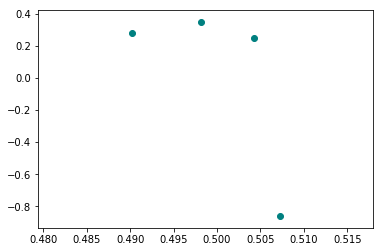

In [410]:
plt.scatter(df1.loc[0], df1.loc[1], color = 'teal')

Instead of the whole code up where I sorted the values in descending order, i could've just used pca.components which accesses the values and vectors and plotted that easily! so much for getting done early :-/

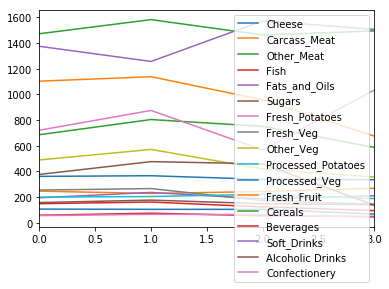

In [408]:
X.plot();


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


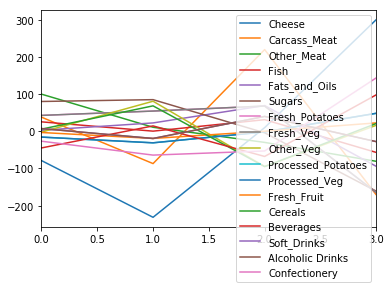

In [307]:
Projected.plot();

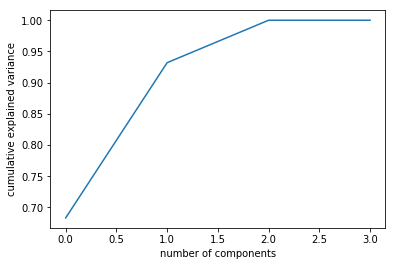

In [405]:
pca = PCA().fit(final_center)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

This is a scree plot showing variance by each principal component. It shows which components describe most of the variation within the data. Hence, which ones are most useful. So, we can use those to construct the dimensions for the new feature space. 

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler 

In [0]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
points.shape

(200, 2)

In [0]:
points.describe()

,x,y
count,200.000000,200.000000
mean,-2.323298,-3.422869
std,4.556513,5.580888
min,-10.118473,-11.095795
25%,-4.619520,-8.246848
50%,-3.373794,-5.307697
75%,-0.427175,3.360028
max,7.807885,5.883054


Even though this specific dataset isn't huge, we will perform PCA to get into lower dimensional dataset.

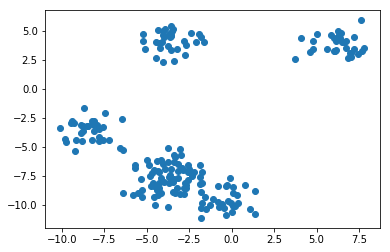

In [0]:
#to see what it looks like initially
plt.scatter(points.x, points.y)
plt.show()


In [0]:
#We standardize the data
scaler = StandardScaler() #we center and scale each feature independently
(scaler.fit(points)) #computes the mean and std to be used for later scaling


StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaler.mean_

array([-2.32329816, -3.42286901])

In [0]:
scaled = pd.DataFrame(scaler.transform(points)) #fit and then transform points

#PCA#
- perform PCA on the scaled data

In [0]:
pca = PCA(2)
pca.fit(scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
points_pca = pd.DataFrame(pca.transform(scaled))

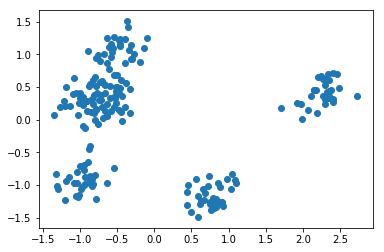

In [0]:
plt.scatter(points_pca[0], points_pca[1])


###get kmeans using Scikit-Learn###

In [0]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(points_pca)

labels = kmeans.labels_
print(labels)

[3 1 1 3 1 1 3 3 2 1 1 1 1 1 3 1 3 1 1 0 3 0 0 0 1 1 1 2 1 1 1 1 1 0 1 1 1
 1 2 1 1 0 2 2 2 1 1 1 3 1 0 3 3 2 0 1 1 2 2 3 0 1 3 2 0 2 0 2 3 2 1 1 1 1
 0 0 1 1 2 0 2 1 1 1 2 1 2 1 1 0 2 1 0 1 1 1 1 1 1 1 1 1 3 1 1 0 3 3 3 0 1
 0 1 3 1 1 2 2 0 2 0 1 1 3 1 3 1 0 2 3 1 3 1 3 2 2 1 0 3 1 2 1 1 0 1 2 1 2
 3 1 1 1 3 0 1 2 1 0 1 3 1 1 2 3 0 0 1 2 1 1 3 1 2 0 1 1 1 1 1 3 1 1 1 1 1
 1 3 0 2 1 1 3 0 3 1 2 0 0 1 1]


In [0]:
pca_df['cluster'] = labels

pca_df = pca_df.rename({0:"x", 1:"y"}, axis = 'columns')
pca_df.sample(5)


,x,y,cluster
126,-0.519162,0.507453,1
3,-0.863236,-0.405686,3
40,-0.359630,1.507991,1
124,-1.205217,0.211048,1
127,2.341881,0.443994,0


In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'teal', 3: 'pink', 4:'teal'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  plt.title('PCA with k-means clustering')
  
  grouped = df.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()


In [0]:
def get_centroids(df, column):
  return df.groupby(column).mean()

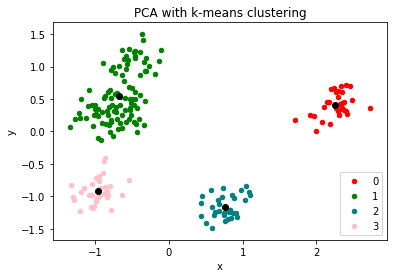

In [0]:
centroids = get_centroids(pca_df, 'cluster')
plot_clusters(pca_df, 'cluster', centroids)

In [0]:
pca_df.shape

(200, 3)